In [1]:
import sys
import time

sys.path.append("..")
import uniplot as up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import solv_fzcp as sfzcp
import uvarprob as uvpr

In [2]:
test_file = "../tst2.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,x^3+2.*x+cos(10.*x),-3.0,3.0,0,0
2,-(x^2.)*sin(1.*x)+1.0,0.2,7.0,0,0
3,(3.*x-1.4)*sin(18.*x)+1.7,0.0,7.0,0,0
4,(x+ 1.)^3/x^2-7.1,0.1,7.0,0,0
5,sin(x)/x+cos(x),0.1,10.0,0,0
6,x^3-3.0*x^2+2.0*x+5.0*sin(5.0*x),-5.0,5.0,0,0
7,1/16.0*x^6 - 3/5.0*x^5 - 13/2.0 * x^4 + 211/1...,-5.0,5.0,0,0
8,log(x)+1.0/x^2-2,0.1,10.0,0,0
9,x^7 + x^6 - 3.0*x^5 - 10.0*x^4 + 14.0*x^3 - 1...,-5.0,5.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [],'bnb2_psl_points_list':[],'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_psl_points_list']))
    # print('Piyavskii, Lipschitz constant:',sfzcp.new_method(prob, symm=True, epsilon=1e-9,global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=',T2-T1)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    # print('Piyavskii, Lipschitz interval:',sfzcp.new_method(prob, symm=False, epsilon=1e-9,global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=',T2-T1)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_lip_points_list']))
    # print('PSQE, Lipschitz constant:',sfzcp.new_method(prob, symm=True, epsilon=1e-9,global_lipschitz_interval=False, estimator=2))
    # T2 = time.perf_counter()
    # print('time=',T2-T1)

    T1 = time.perf_counter()
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']))
    print('PSQE, Lipschitz interval:',sfzcp.new_method(prob, symm=False, epsilon=1e-5,global_lipschitz_interval=True, estimator=2))
    T2 = time.perf_counter()
    print('time=',T2-T1)


1
PSQE, Lipschitz interval: TestResult(nsteps=7, first_crossing_zero_point=[-0.130453438877509])
time= 0.064814875004231
2
PSQE, Lipschitz interval: TestResult(nsteps=9, first_crossing_zero_point=[1.0682235423486324])
time= 0.02773837500717491
3
PSQE, Lipschitz interval: TestResult(nsteps=49, first_crossing_zero_point=[1.2655389138246325])
time= 0.04865954100387171
4
PSQE, Lipschitz interval: TestResult(nsteps=705, first_crossing_zero_point=[1.3646408837297082])
time= 0.017788915996789
5
PSQE, Lipschitz interval: TestResult(nsteps=55, first_crossing_zero_point=[2.028757838110434])
time= 0.03302362500107847
6
PSQE, Lipschitz interval: TestResult(nsteps=10, first_crossing_zero_point=[-0.8759863888031947])
time= 0.022823207997134887
7
PSQE, Lipschitz interval: TestResult(nsteps=11, first_crossing_zero_point=[-1.1593583789803303])
time= 0.017458541013184004
8
PSQE, Lipschitz interval: TestResult(nsteps=9, first_crossing_zero_point=[0.6391981064536456])
time= 0.01125445899378974
9
PSQE, Lip

In [9]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps=1e-5
for test in df.itertuples():

    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    T1 = time.perf_counter()
    PC_N=sfzcp.new_method(prob, symm=True, epsilon=eps,global_lipschitz_interval=True, estimator=1,reduction=False).nsteps
    T2 = time.perf_counter()
    time_PC_N=T2-T1
    T1 = time.perf_counter()
    PI_N=sfzcp.new_method(prob, symm=False, epsilon=eps,global_lipschitz_interval=True, estimator=1,reduction=False).nsteps
    T2 = time.perf_counter()
    time_PI_N=T2-T1
    T1 = time.perf_counter()
    QC_N=sfzcp.new_method(prob, symm=True, epsilon=eps,global_lipschitz_interval=True, estimator=2,reduction=False).nsteps
    T2 = time.perf_counter()
    time_QC_N=T2-T1
    T1 = time.perf_counter()
    QI_N=sfzcp.new_method(prob, symm=False, epsilon=eps,global_lipschitz_interval=True, estimator=2,reduction=False).nsteps
    T2 = time.perf_counter()
    time_QI_N=T2-T1

    T1 = time.perf_counter()
    PC_R=sfzcp.new_method(prob, symm=True, epsilon=eps,global_lipschitz_interval=True, estimator=1,reduction=True).nsteps
    T2 = time.perf_counter()
    time_PC_R=T2-T1
    T1 = time.perf_counter()
    PI_R=sfzcp.new_method(prob, symm=False, epsilon=eps,global_lipschitz_interval=True, estimator=1,reduction=True).nsteps
    T2 = time.perf_counter()
    time_PI_R=T2-T1
    T1 = time.perf_counter()
    QC_R=sfzcp.new_method(prob, symm=True, epsilon=eps,global_lipschitz_interval=True, estimator=2,reduction=True).nsteps
    T2 = time.perf_counter()
    time_QC_R=T2-T1
    T1 = time.perf_counter()
    QI_R=sfzcp.new_method(prob, symm=False, epsilon=eps,global_lipschitz_interval=True, estimator=2,reduction=True).nsteps
    T2 = time.perf_counter()
    time_QI_R=T2-T1

    print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' %(test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R))
    print('%s & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f \\\\' %(test.Index,time_PC_N,time_PI_N,time_QC_N,time_QI_N,time_PC_R,time_PI_R,time_QC_R,time_QI_R))

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
1 & 105 & 51 & 33 & 33 & 53 & 37 & 7 & 7 \\
1 & 0.026 & 0.004 & 0.013 & 0.005 & 0.018 & 0.002 & 0.007 & 0.001 \\
2 & 406 & 406 & 34 & 34 & 242 & 242 & 9 & 9 \\
2 & 0.071 & 0.026 & 0.012 & 0.005 & 0.067 & 0.016 & 0.010 & 0.001 \\
3 & 647 & 647 & 83 & 83 & 366 & 366 & 49 & 49 \\
3 & 0.113 & 0.043 & 0.026 & 0.012 & 0.102 & 0.025 & 0.036 & 0.007 \\
4 & 300595 & 82497 & 5433 & 1209 & 258437 & 81611 & 3729 & 705 \\
4 & 0.923 & 0.223 & 0.032 & 0.006 & 0.740 & 0.226 & 0.022 & 0.004 \\
5 & 1113 & 1113 & 103 & 103 & 689 & 689 & 55 & 55 \\
5 & 0.187 & 0.176 & 0.020 & 0.016 & 0.173 & 0.172 & 0.022 & 0.009 \\
6 & 640 & 420 & 30 & 30 & 422 & 349 & 10 & 10 \\
6 & 0.140 & 0.032 & 0.011 & 0.005 & 0.150 & 0.028 & 0.014 & 0.012 \\
7 & 991 & 963 & 35 & 33 & 630 & 601 & 11 & 11 \\
7 & 0.005 & 0.004 & 0.000 & 0.000 & 0.003 & 0.002 & 0.000 & 0.000 \\
8 & 2511 & 73 & 93 & 31 & 1617 & 77 & 57 & 9 \\
8 & 0.435 & 0.006 & 0.010 & 0.002 & 0.430 & 0.011 & 0.020 & 0

In [22]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
for test in df.itertuples():

    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    PC_N=sfzcp.new_method(prob, symm=True, epsilon=1e-10,global_lipschitz_interval=False, estimator=1,reduction=False).nsteps

    PI_N=sfzcp.new_method(prob, symm=False, epsilon=1e-10,global_lipschitz_interval=False, estimator=1,reduction=False).nsteps
    QC_N=sfzcp.new_method(prob, symm=True, epsilon=1e-10,global_lipschitz_interval=False, estimator=2,reduction=False).nsteps
    QI_N=sfzcp.new_method(prob, symm=False, epsilon=1e-10,global_lipschitz_interval=False, estimator=2,reduction=False).nsteps

    PC_R=sfzcp.new_method(prob, symm=True, epsilon=1e-10,global_lipschitz_interval=False, estimator=1,reduction=True).nsteps
    PI_R=sfzcp.new_method(prob, symm=False, epsilon=1e-10,global_lipschitz_interval=False, estimator=1,reduction=True).nsteps
    QC_R=sfzcp.new_method(prob, symm=True, epsilon=1e-10,global_lipschitz_interval=False, estimator=2,reduction=True).nsteps
    QI_R=sfzcp.new_method(prob, symm=False, epsilon=1e-10,global_lipschitz_interval=False, estimator=2,reduction=True).nsteps

    print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' %(test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R))
    # P: Piyavskii estimator
    # Q: Piecewise smooth quadratic estimator
    # C: Lipschitz constant
    # I: Lipschitz interval
    # N: without reduction
    # R: with reduction

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
10 & 82 & 58 & 72 & 226 & 18 & 13 & 15 & 10 \\
1 & 69 & 65 & 61 & 179 & 11 & 10 & 7 & 7 \\
2 & 59 & 53 & 293 & 291 & 11 & 9 & 7 & 7 \\
3 & 76 & 76 & 78 & 220 & 27 & 25 & 19 & 19 \\
4 & 84 & 110 & 158 & 578 & 31 & 26 & 16 & 14 \\
5 & 70 & 76 & 84 & 148 & 12 & 11 & 7 & 7 \\
6 & 67 & 67 & 69 & 113 & 14 & 12 & 8 & 8 \\
7 & 65 & 83 & 81 & 339 & 14 & 11 & 6 & 6 \\
8 & 62 & 84 & 66 & 166 & 11 & 10 & 8 & 8 \\
9 & 88 & 72 & 74 & 430 & 23 & 19 & 16 & 15 \\
11 & 21 & 15 & 9 & 9 & 12 & 11 & 7 & 5 \\
12 & 71 & 83 & 83 & 103 & 18 & 18 & 9 & 8 \\
13 & 76 & 66 & 64 & 248 & 18 & 14 & 11 & 9 \\


In [11]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index=1, objective='x^3+2.*x+cos(10.*x)', a=-3.0, b=3.0, min_f=0, min_x=0)


KeyError: 'bnb2_psl_points_list'

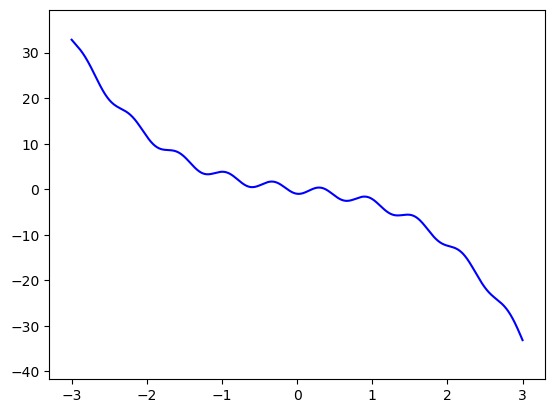

In [12]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['bnb2_psl_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_pslint_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lip_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lipint_points_list'], 3, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lipint_points_list'], 4, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lip_points_list'], 5, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    file_name=test.Index+'.png'
    plt.savefig(file_name, dpi=500)
    plt.show()